In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('global_Power_plant_database.csv') 

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 908
No of Columns: 25


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [5]:
df.isin([' ','NA','-','?']).sum().any()

False

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.083700
generation_gwh_2013                524       57.709251
generation_gwh_2014                507       55.837004
generation_gwh_2015                483       53.193833
generation_gwh_2016                471       51.872247
generation_gwh_2017                465       51.211454
generation_data_source             458       50.440529
commissioning_year                 380       41.850220
latitude                            46        5.066079
longitude                           46        5.066079
geolocation_source                  19        2.092511
name                                 0        0.000000
capacity_mw                          0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000


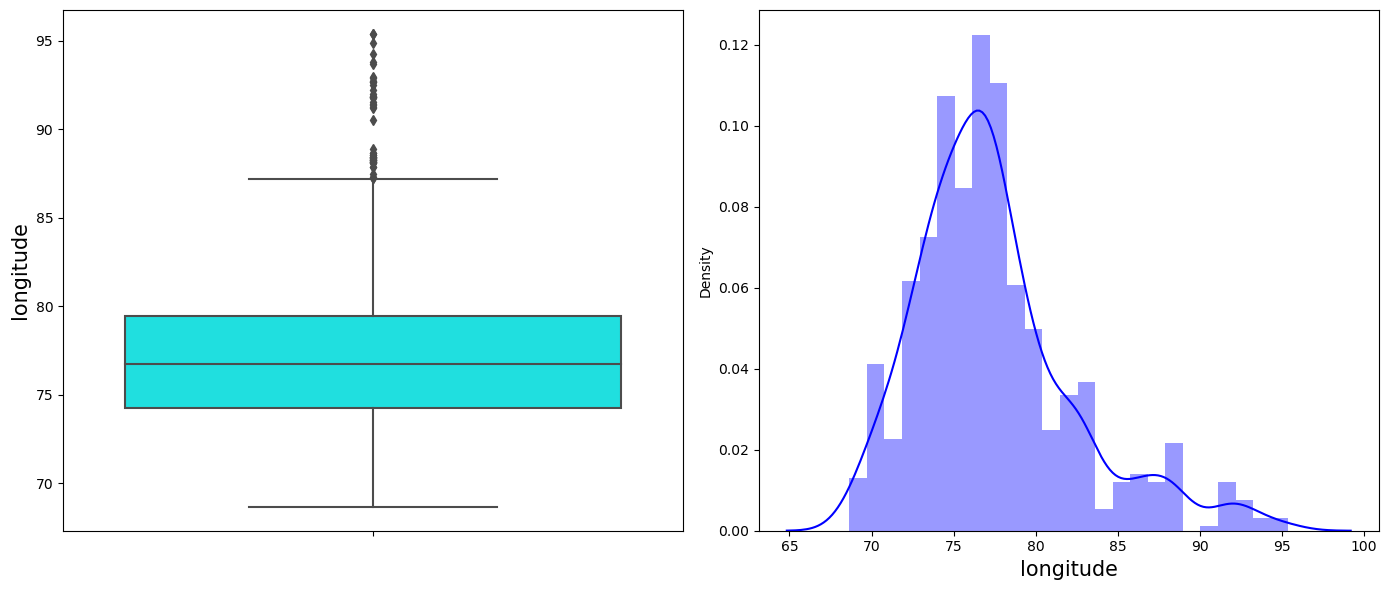

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

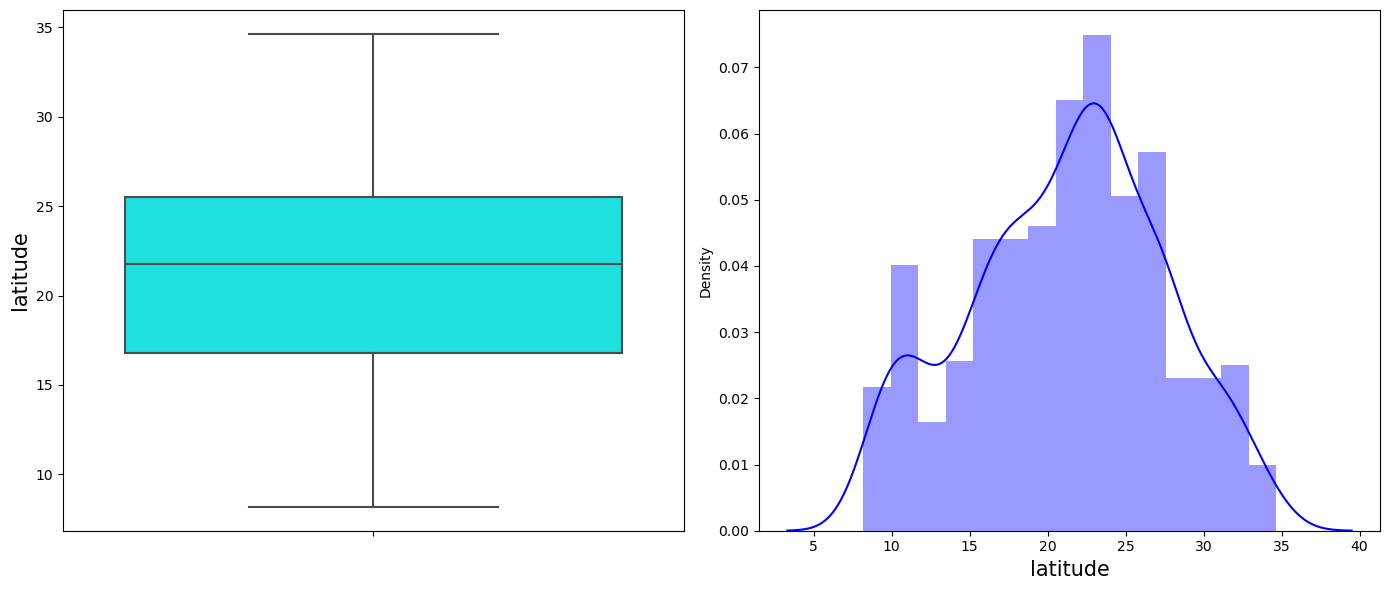

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

In [11]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [12]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.083700
generation_gwh_2013                524       57.709251
generation_gwh_2014                507       55.837004
generation_gwh_2015                483       53.193833
generation_gwh_2016                471       51.872247
generation_gwh_2017                465       51.211454
generation_data_source             458       50.440529
commissioning_year                 380       41.850220
name                                 0        0.000000
capacity_mw                          0        0.000000
latitude                             0        0.000000
longitude                            0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000
geolocation_source                   0        0.000000


In [13]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.410936,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.783873,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.278850,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.183775,79.211600,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [14]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [14]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
881,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,26761.39,27594.0,29047.0,30015.0,35116.0,Central Electricity Authority


In [15]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
830,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


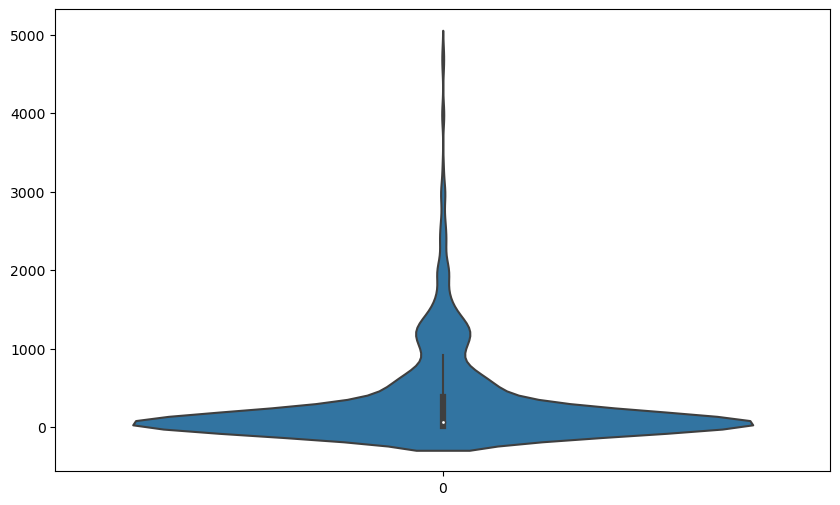

In [16]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

In [17]:
df.loc[df.capacity_mw >1500].shape

(37, 15)

In [18]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

TypeError: countplot() got multiple values for argument 'data'

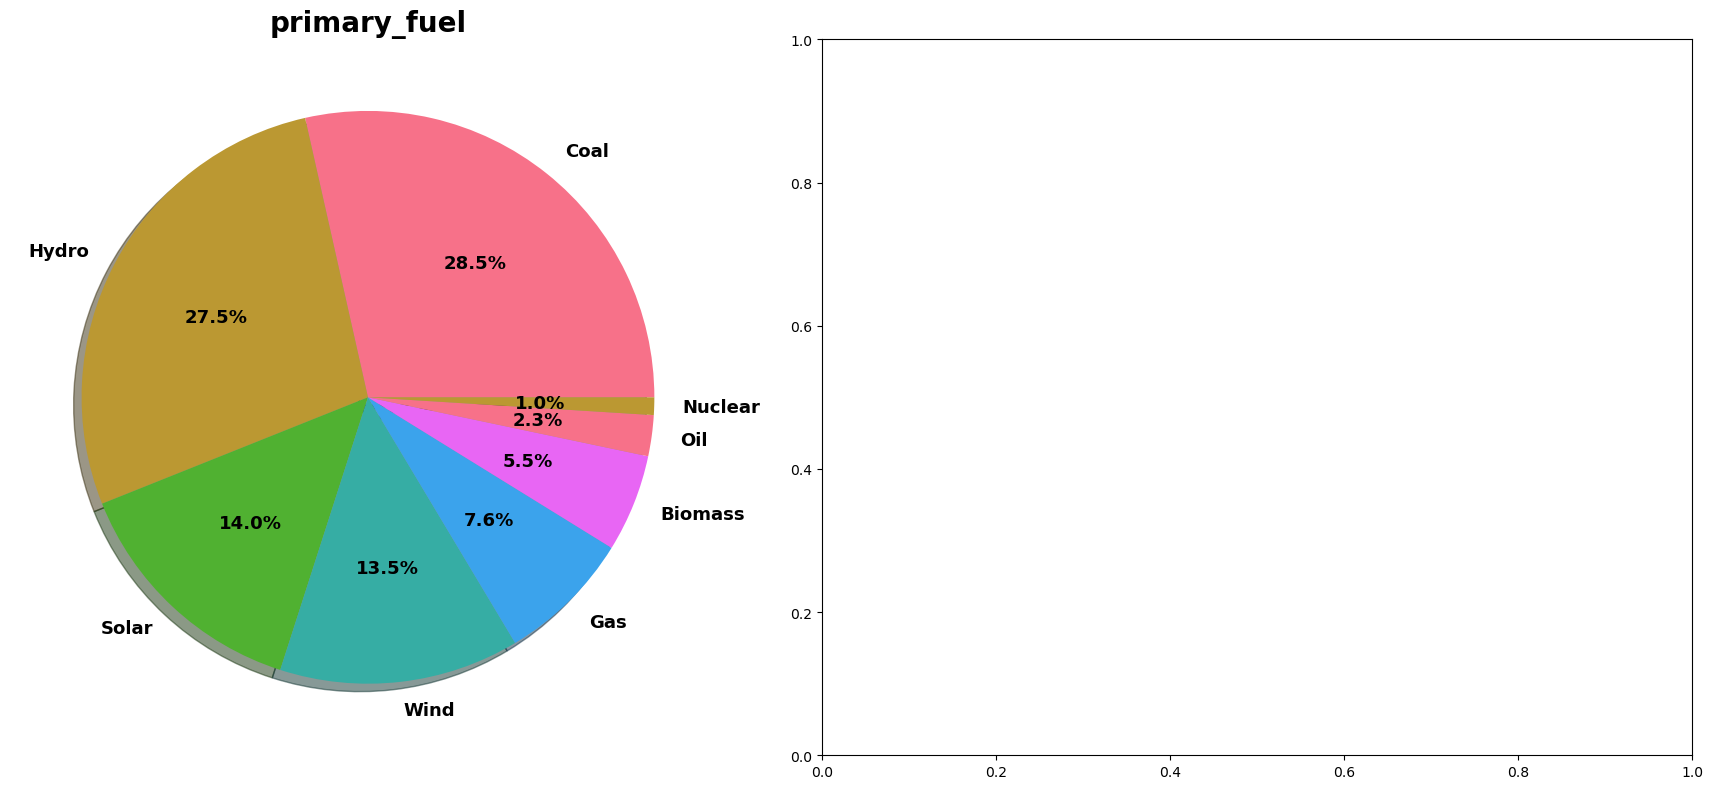

In [19]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [20]:
df.primary_fuel.value_counts()

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64

In [21]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 291510.11100000003 MW


In [22]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,201423.220
Gas,25123.871
Hydro,46331.570
Nuclear,8780.000
Oil,1978.840
Solar,2757.500
Wind,4111.850


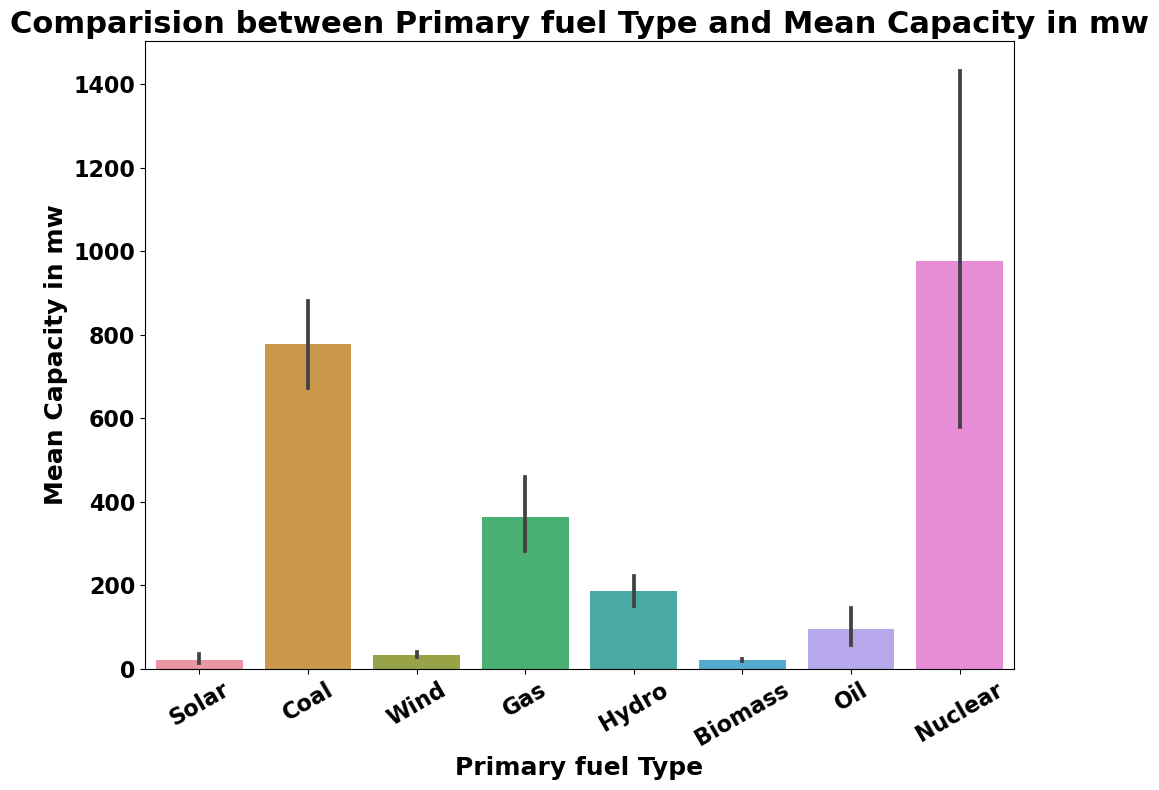

In [23]:
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()


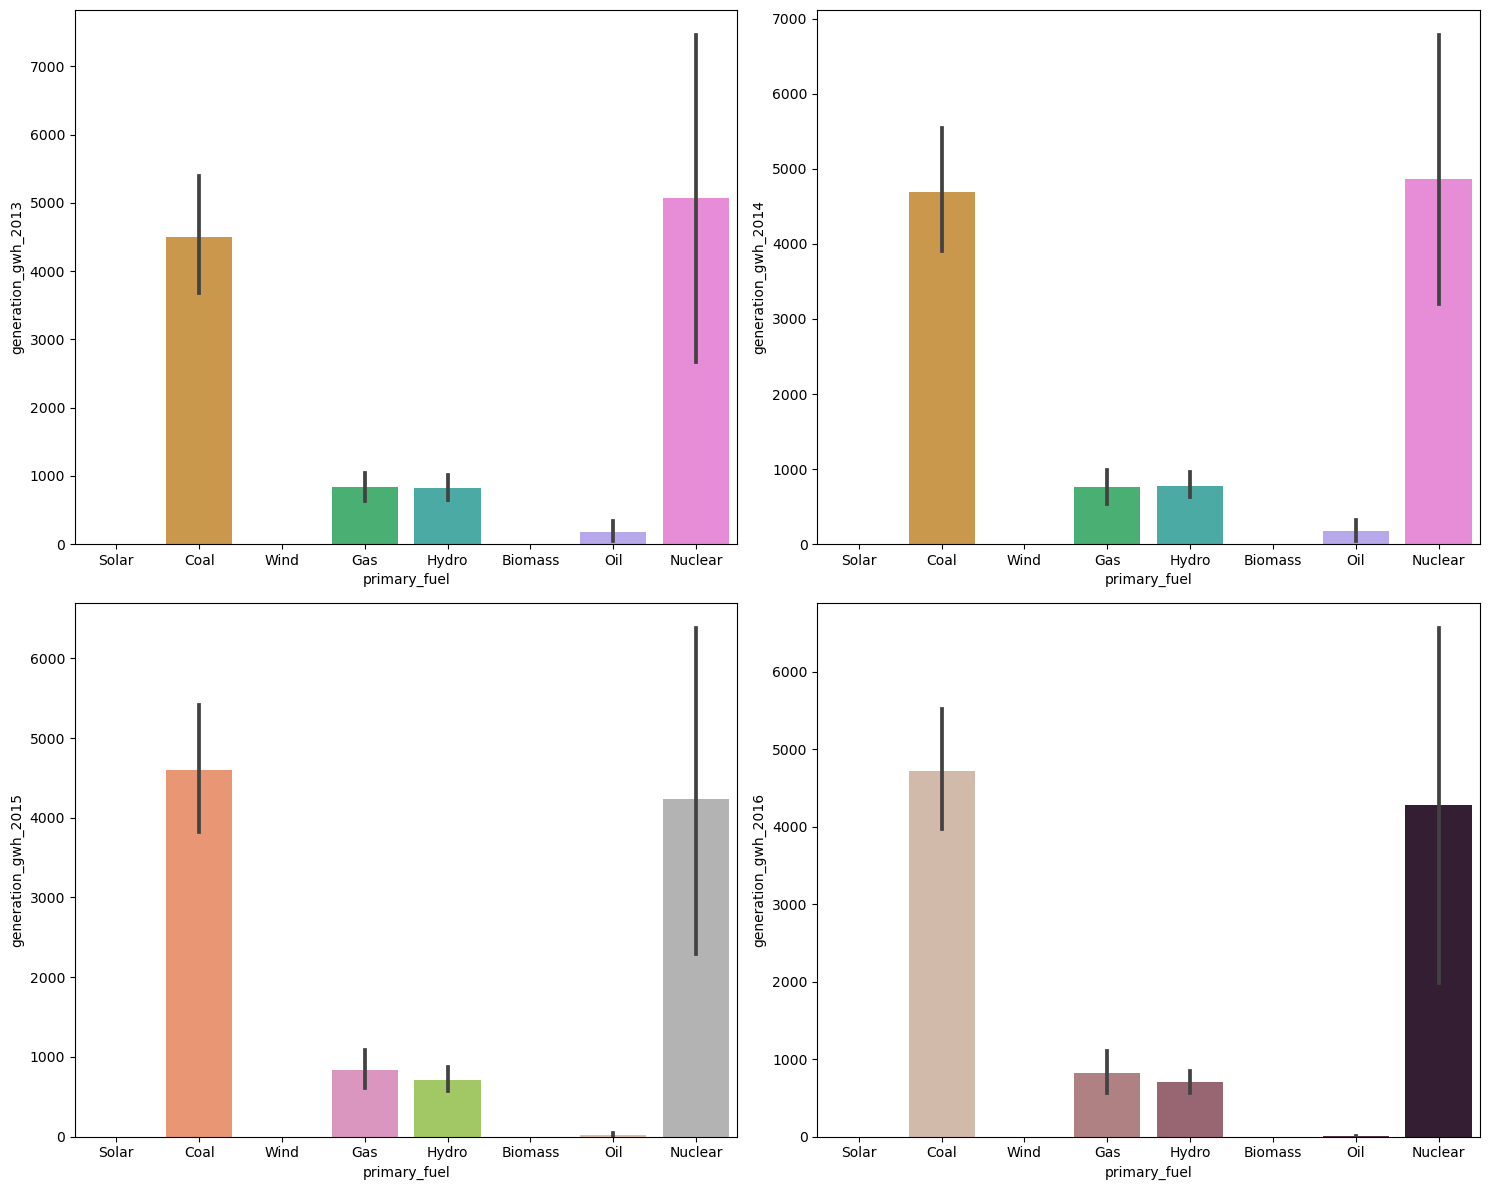

In [24]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

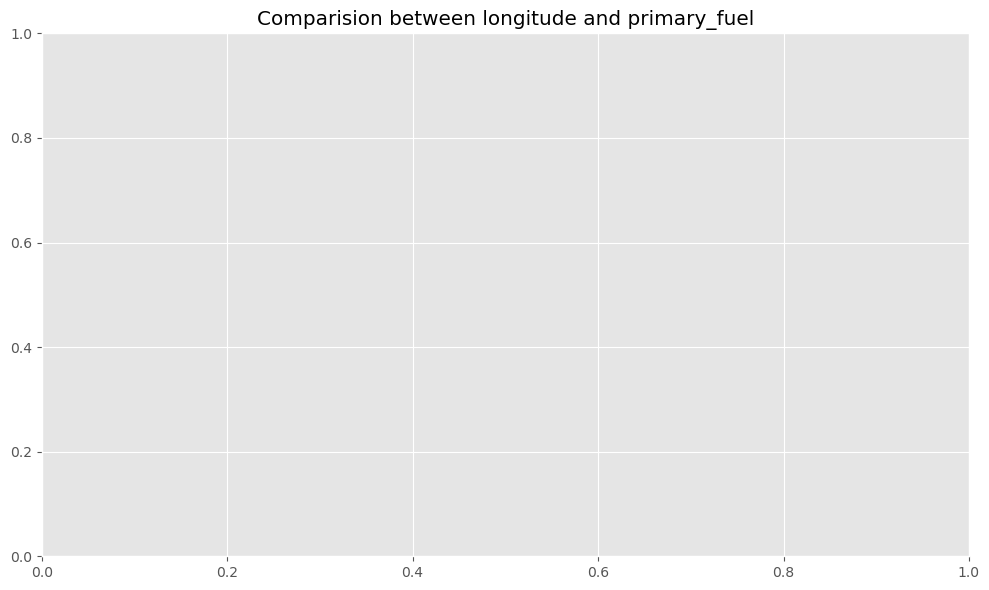

In [25]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

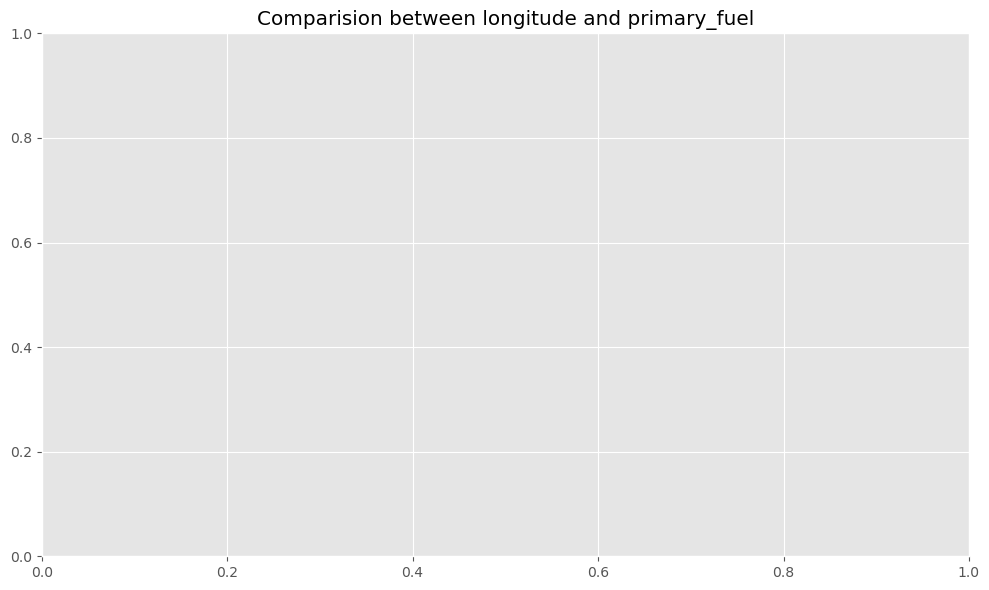

In [26]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["latitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

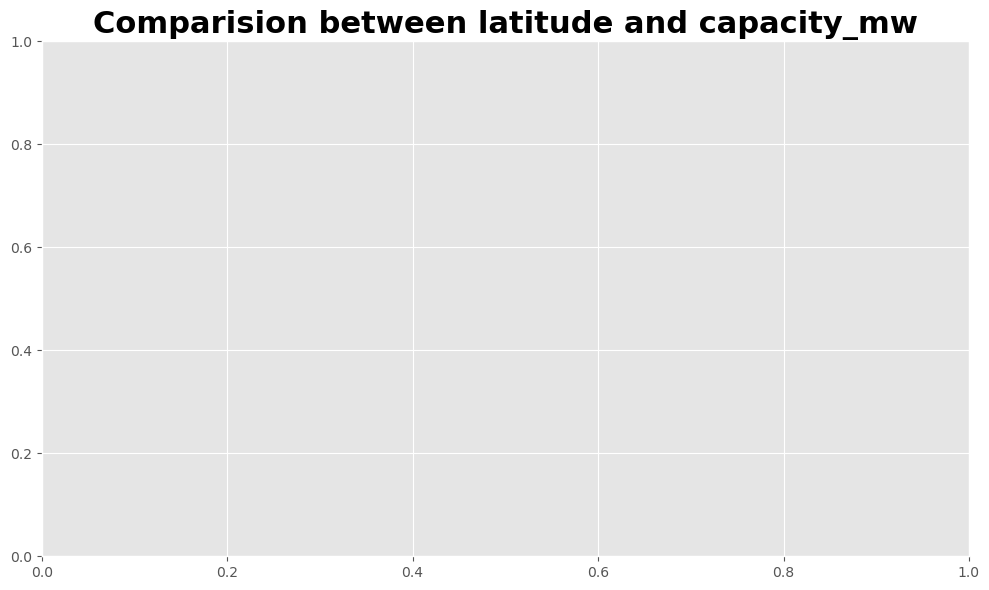

In [27]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(df['latitude'],df["capacity_mw"])
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

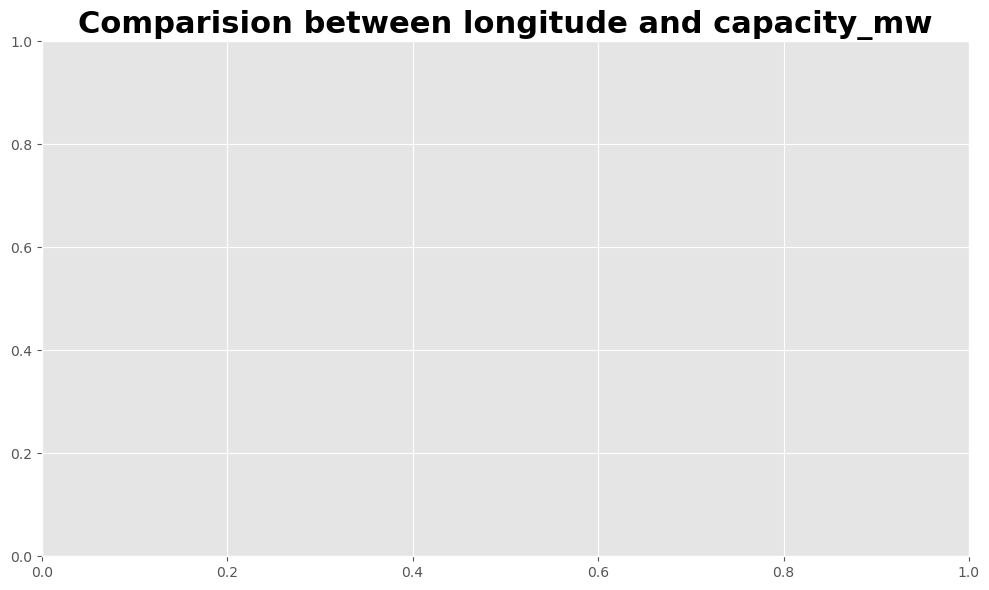

In [28]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(df['longitude'],df["capacity_mw"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()


In [29]:
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [30]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [31]:
df.loc[df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,Power_plant_age
729,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,217.97465,220.82035,215.3777,144.4143,175.92595,Central Electricity Authority,91.0


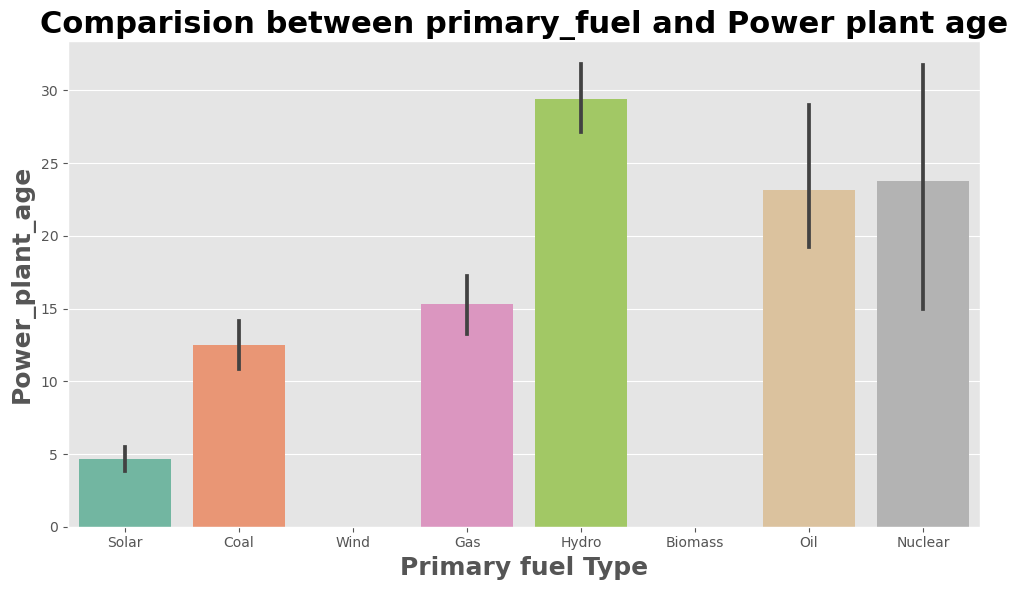

In [32]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

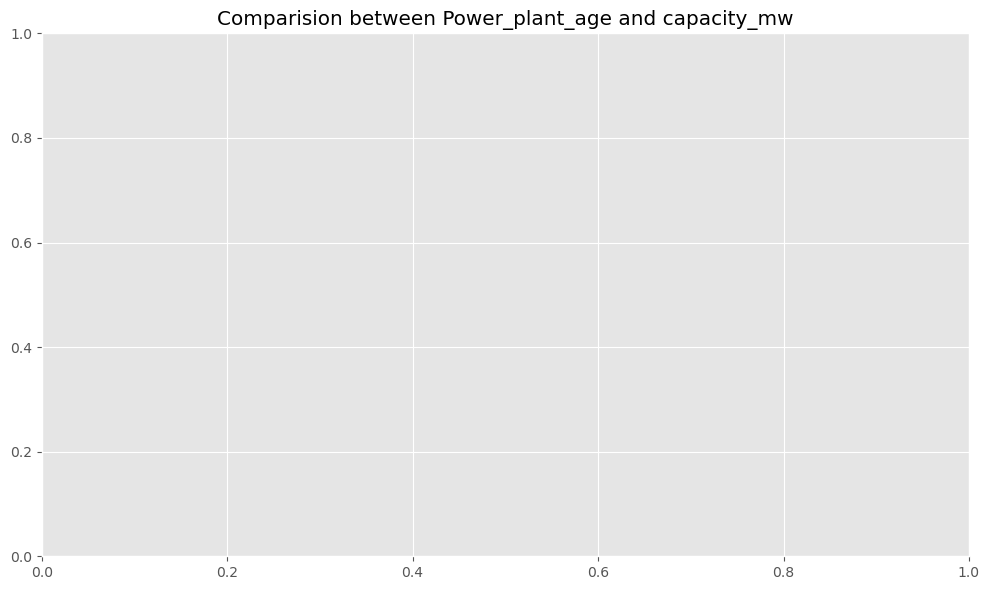

In [34]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = "g")

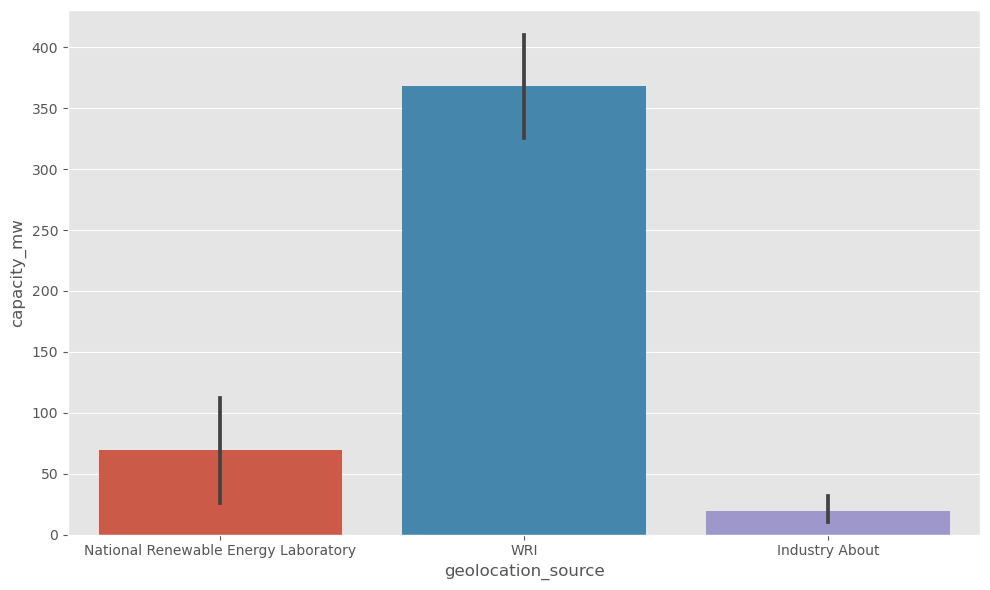

In [35]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

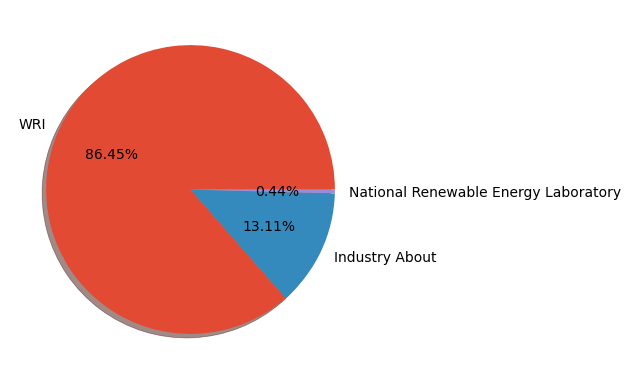

In [36]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [37]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

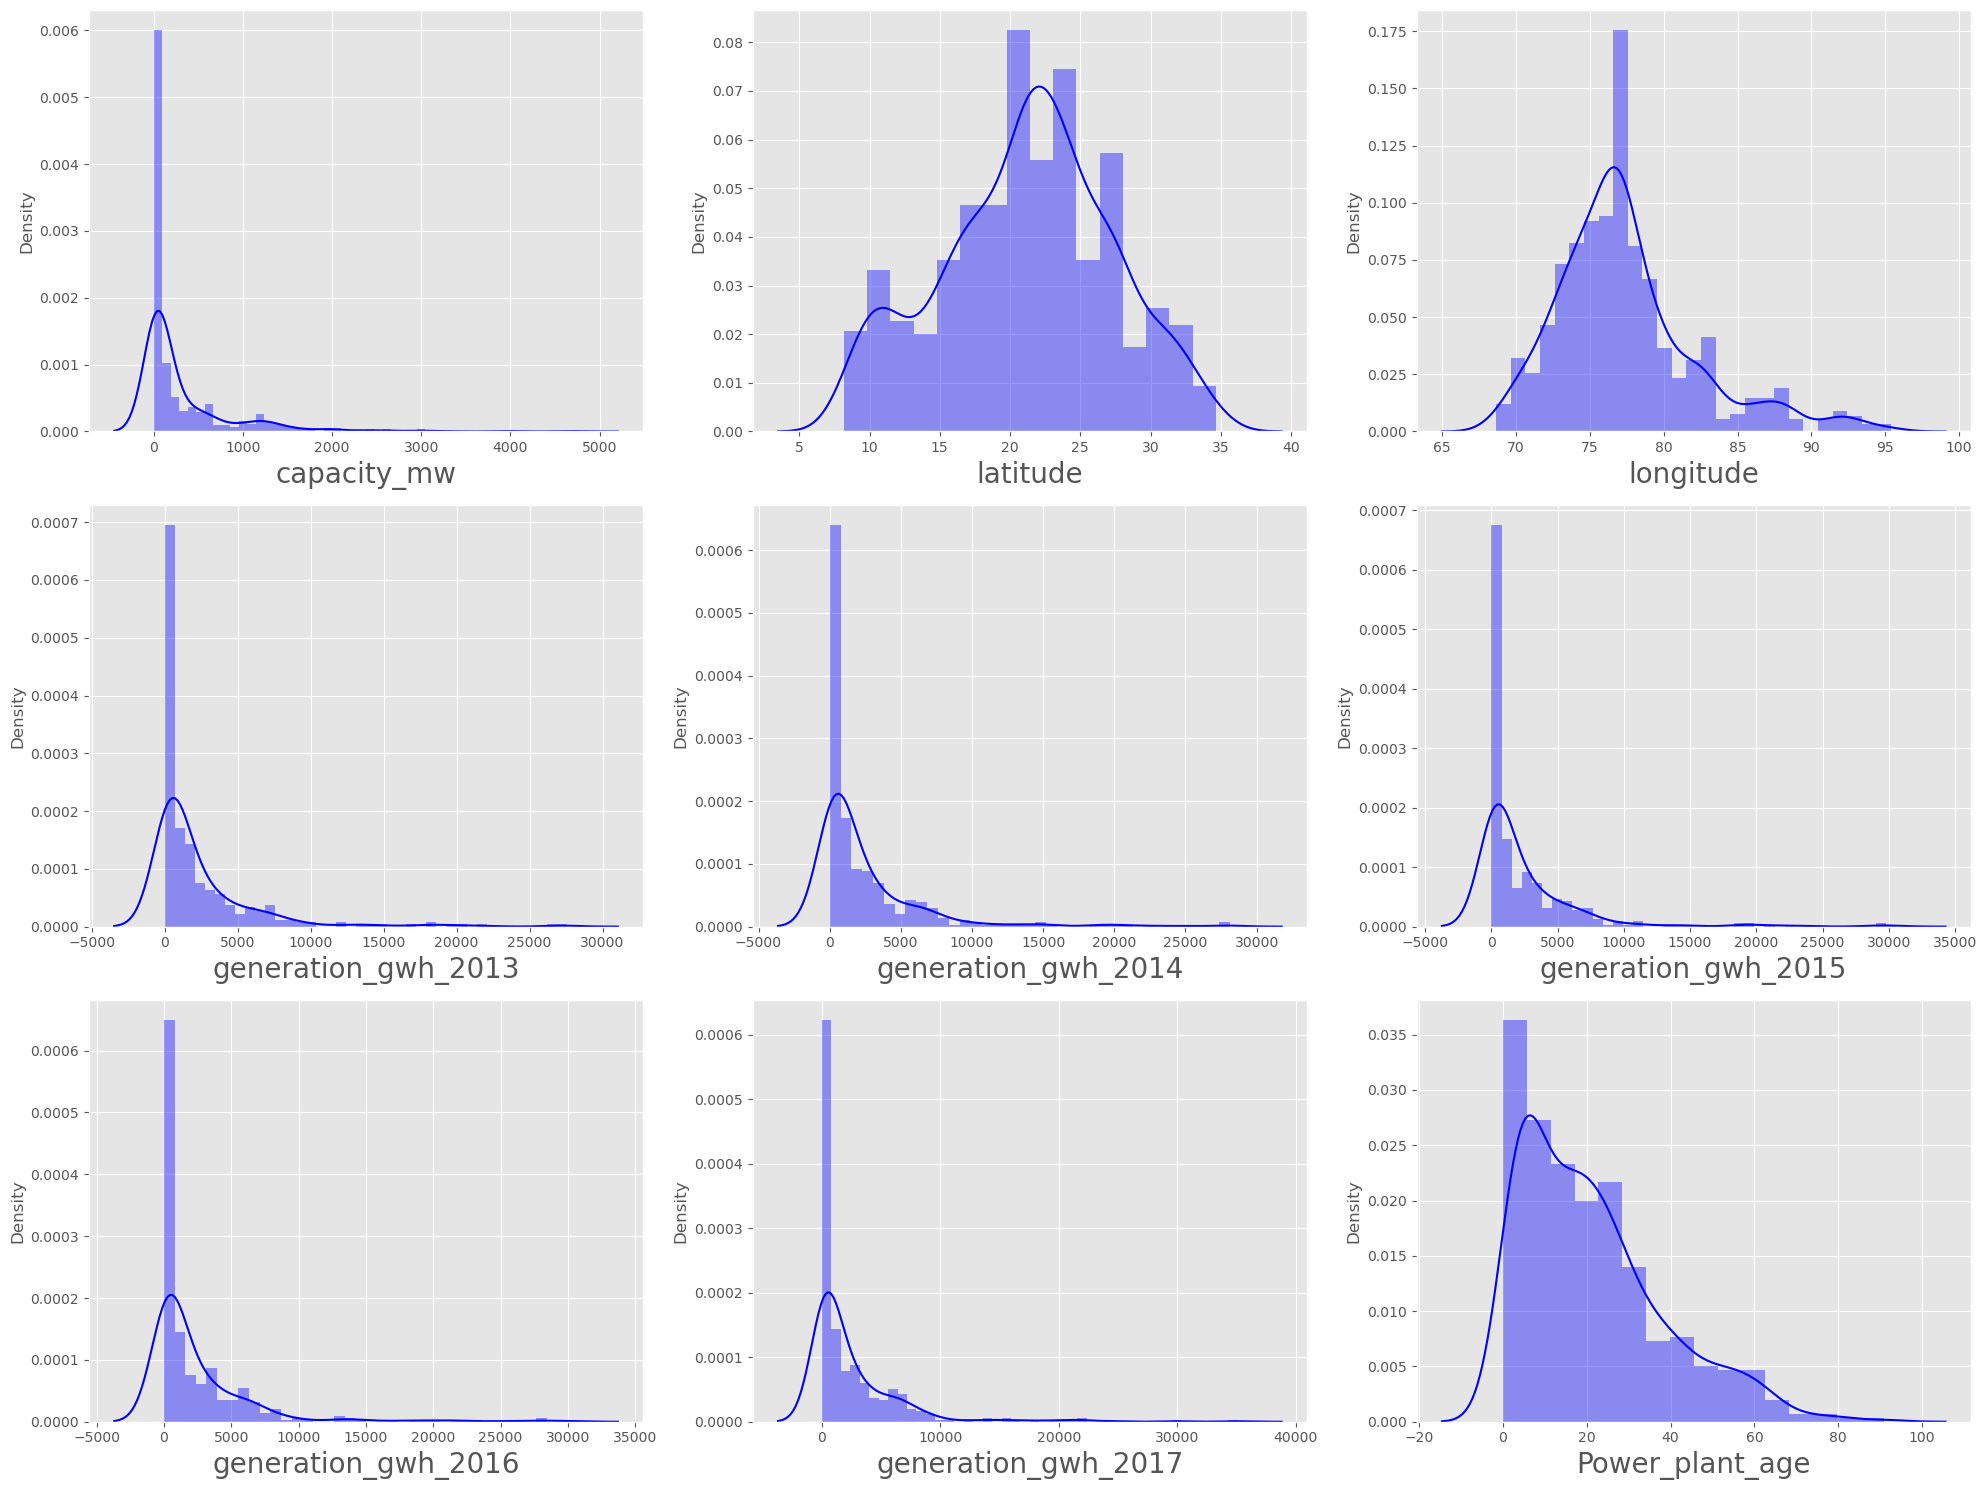

In [38]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

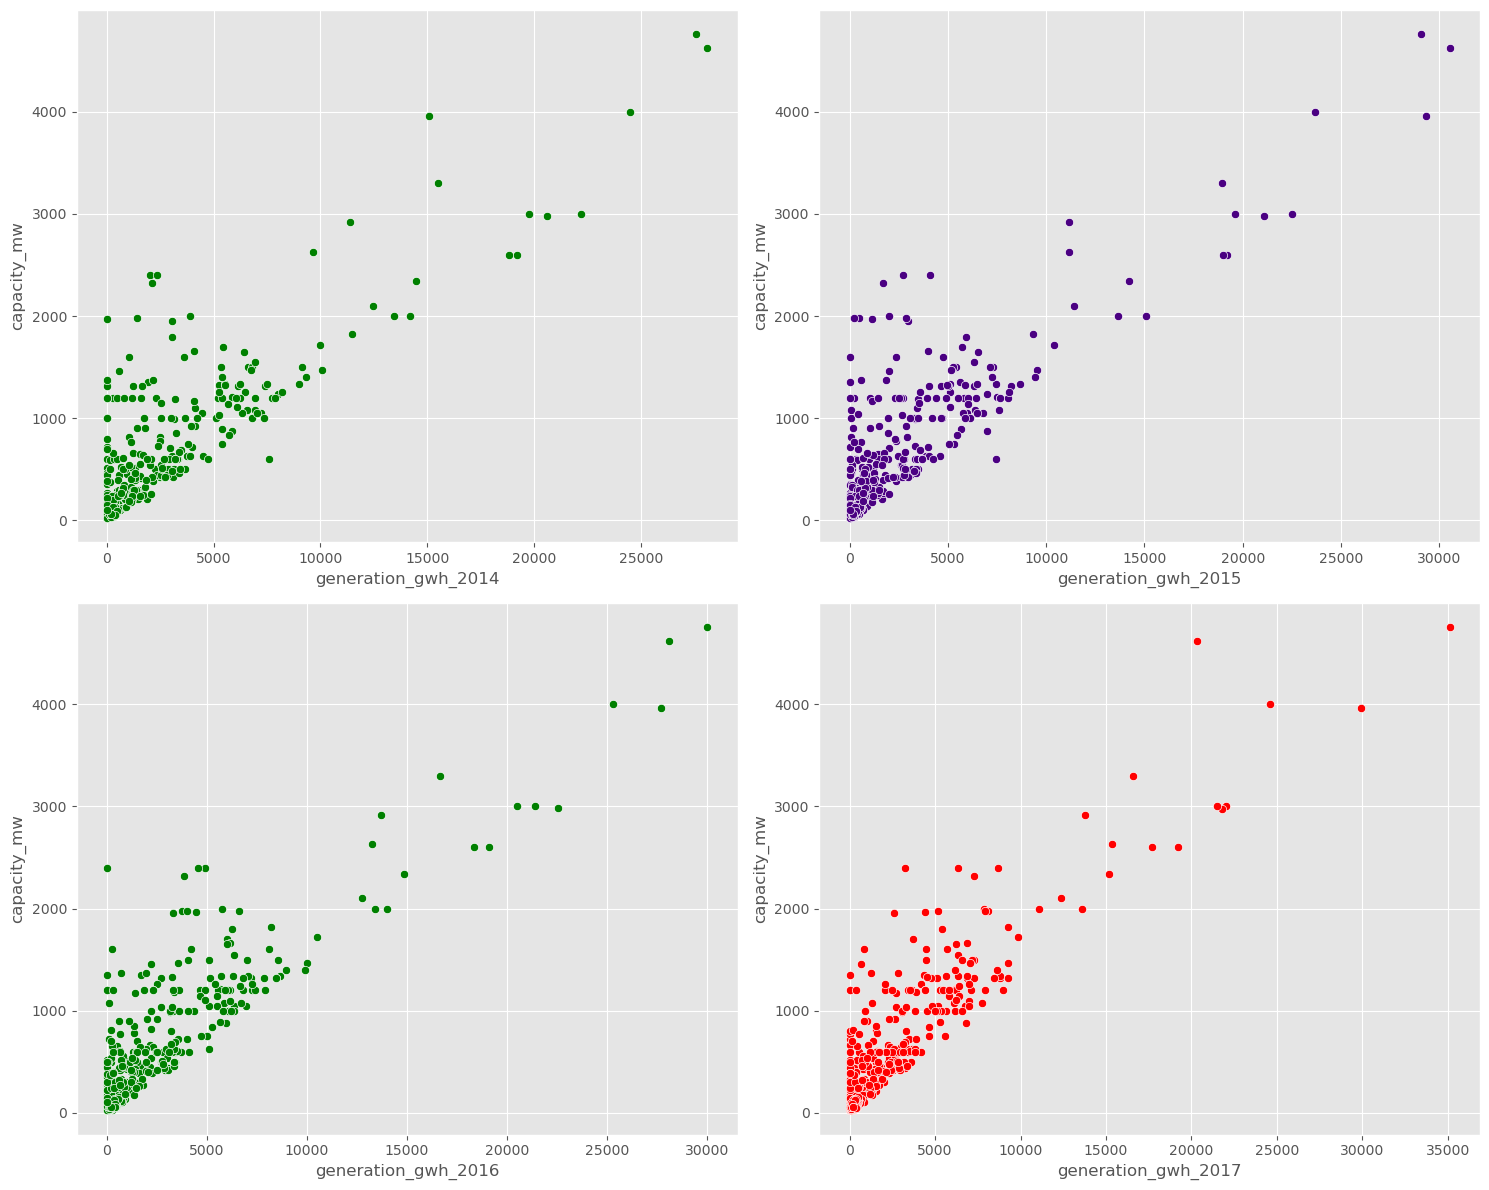

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()


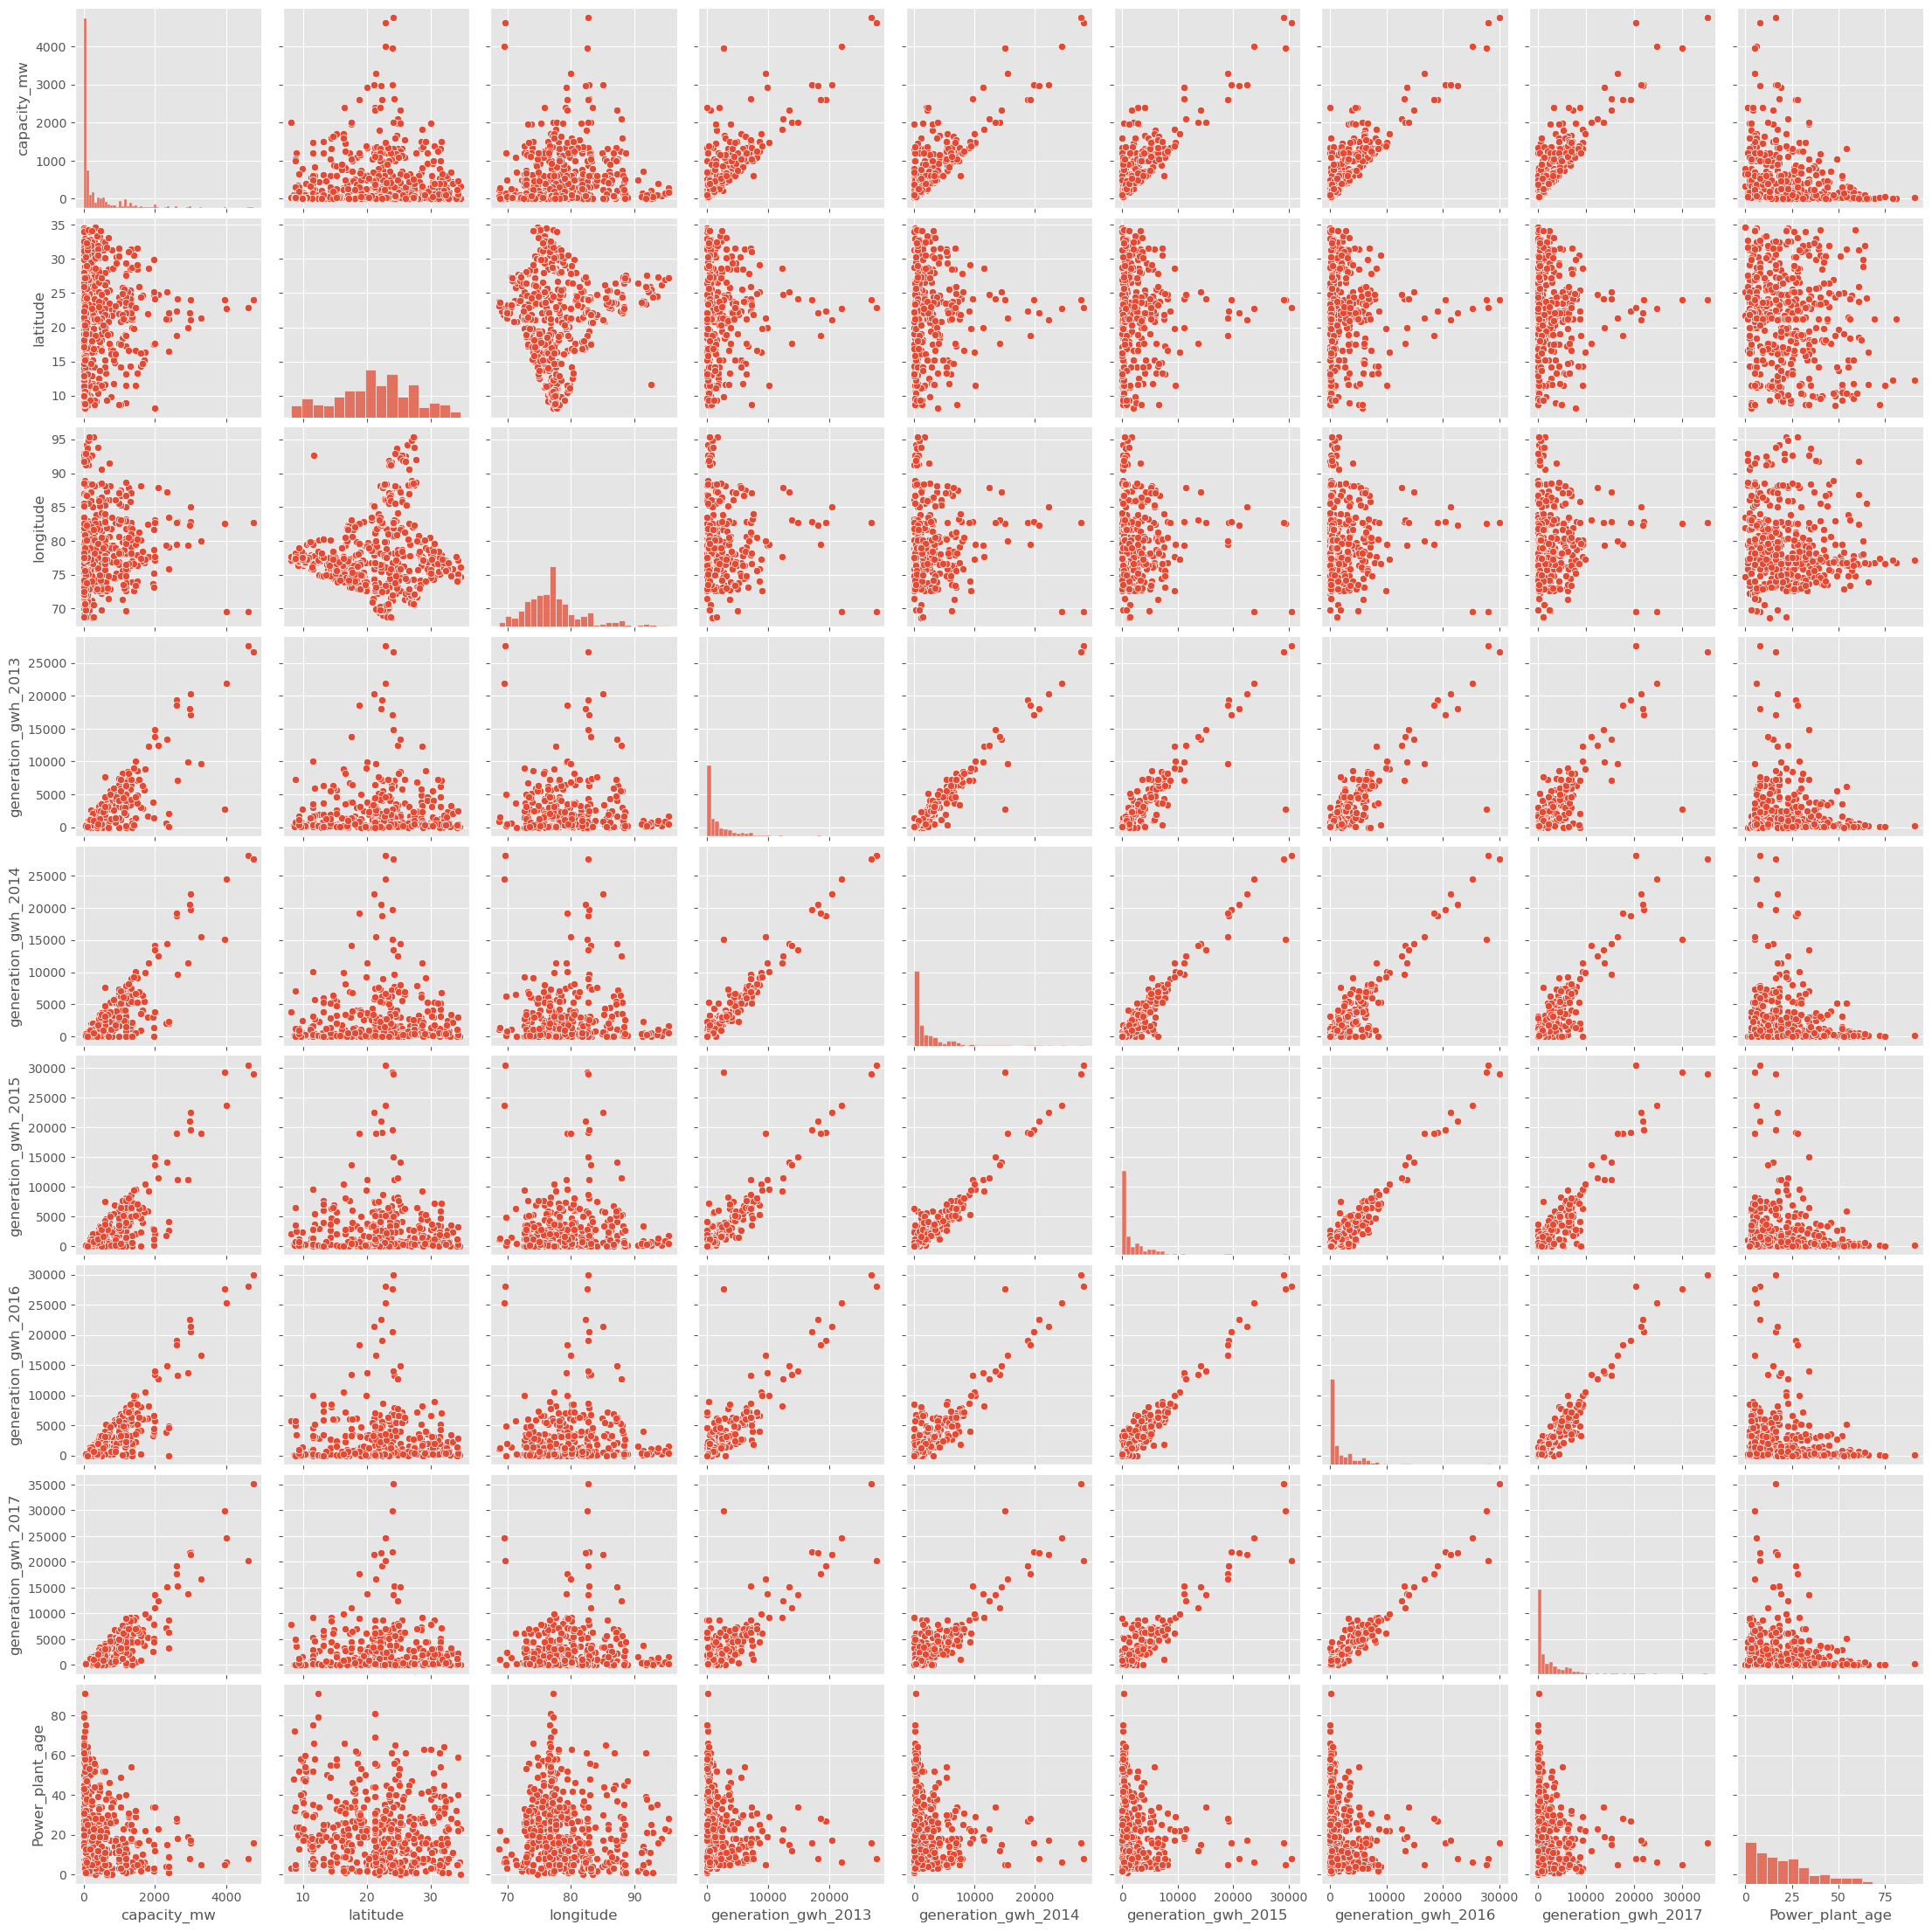

In [40]:
sns.pairplot(df)

In [41]:
df.drop(columns=['name'],axis=1,inplace=True)

In [42]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [43]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,631.777928,617.789264,843.747,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,3.0


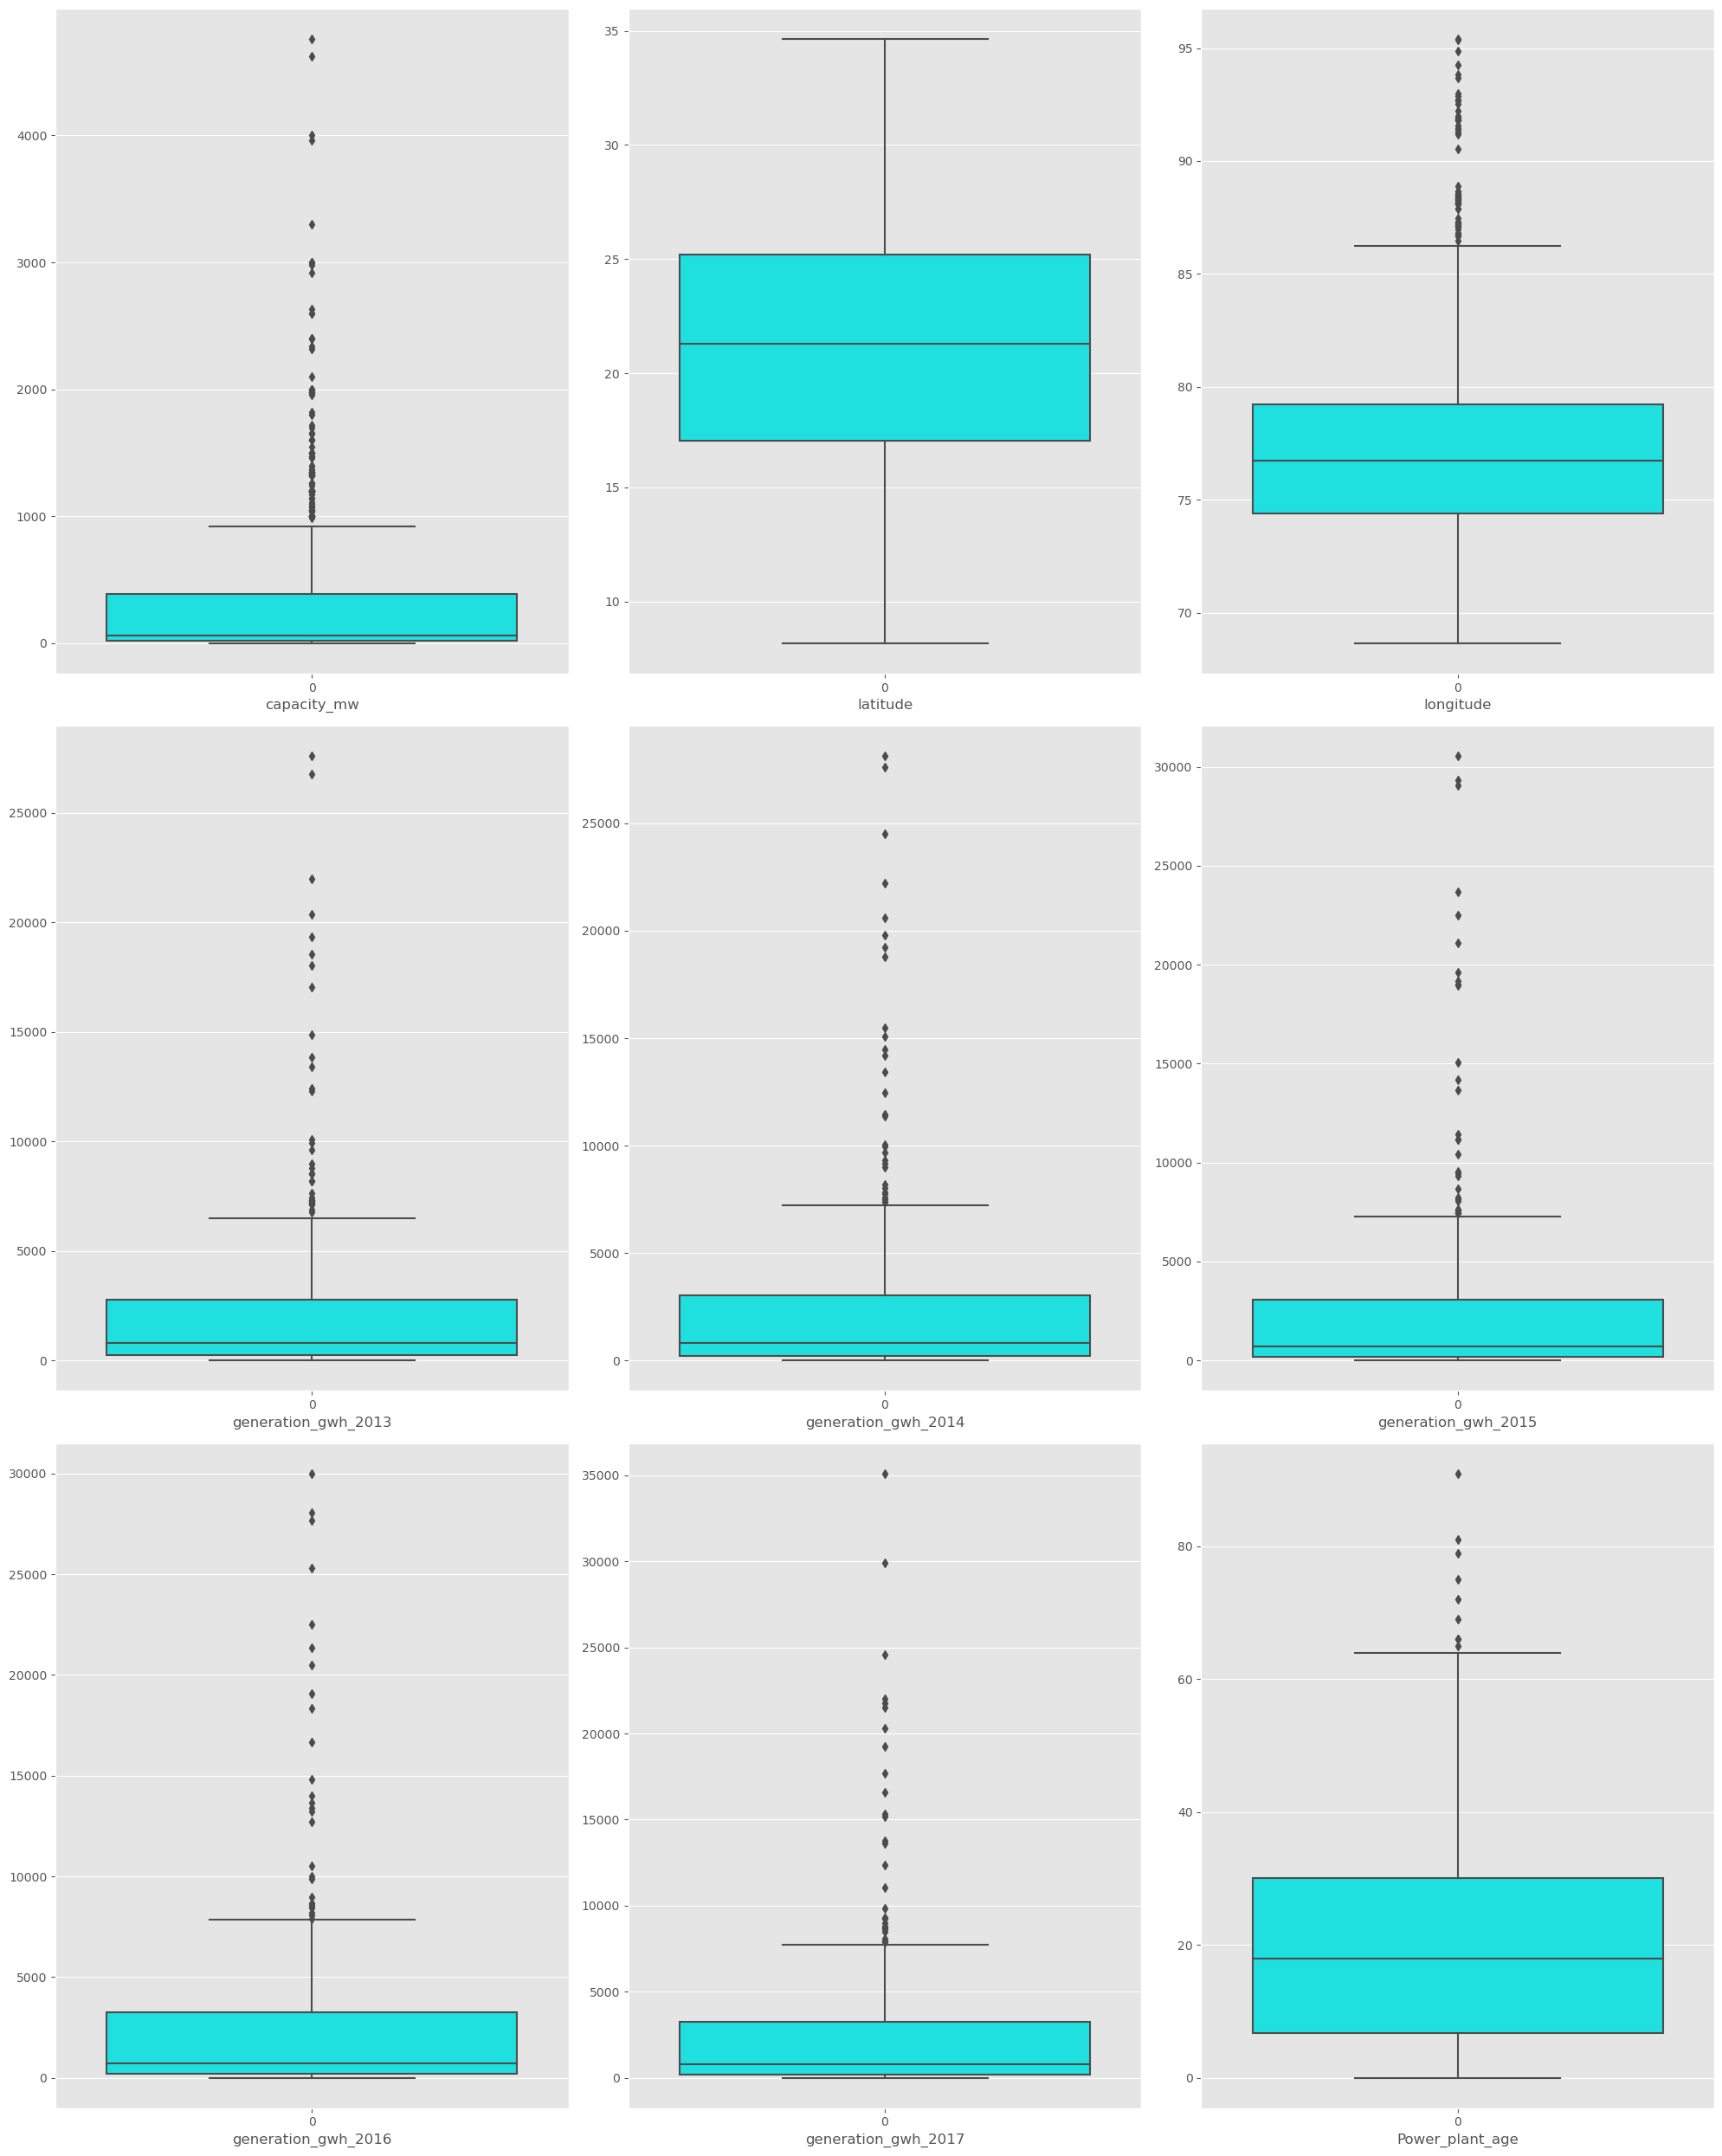

In [45]:
plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [46]:
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [47]:
df2=df.copy

In [48]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             660.000000
latitude                 19.212970
longitude                13.258160
primary_fuel              6.000000
other_fuel1               3.000000
generation_gwh_2013    4600.499035
generation_gwh_2014    5260.710000
generation_gwh_2015    5078.485600
generation_gwh_2016    5200.793260
generation_gwh_2017    5610.347700
Power_plant_age          39.000000
dtype: float64


In [49]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(876, 11)


In [50]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


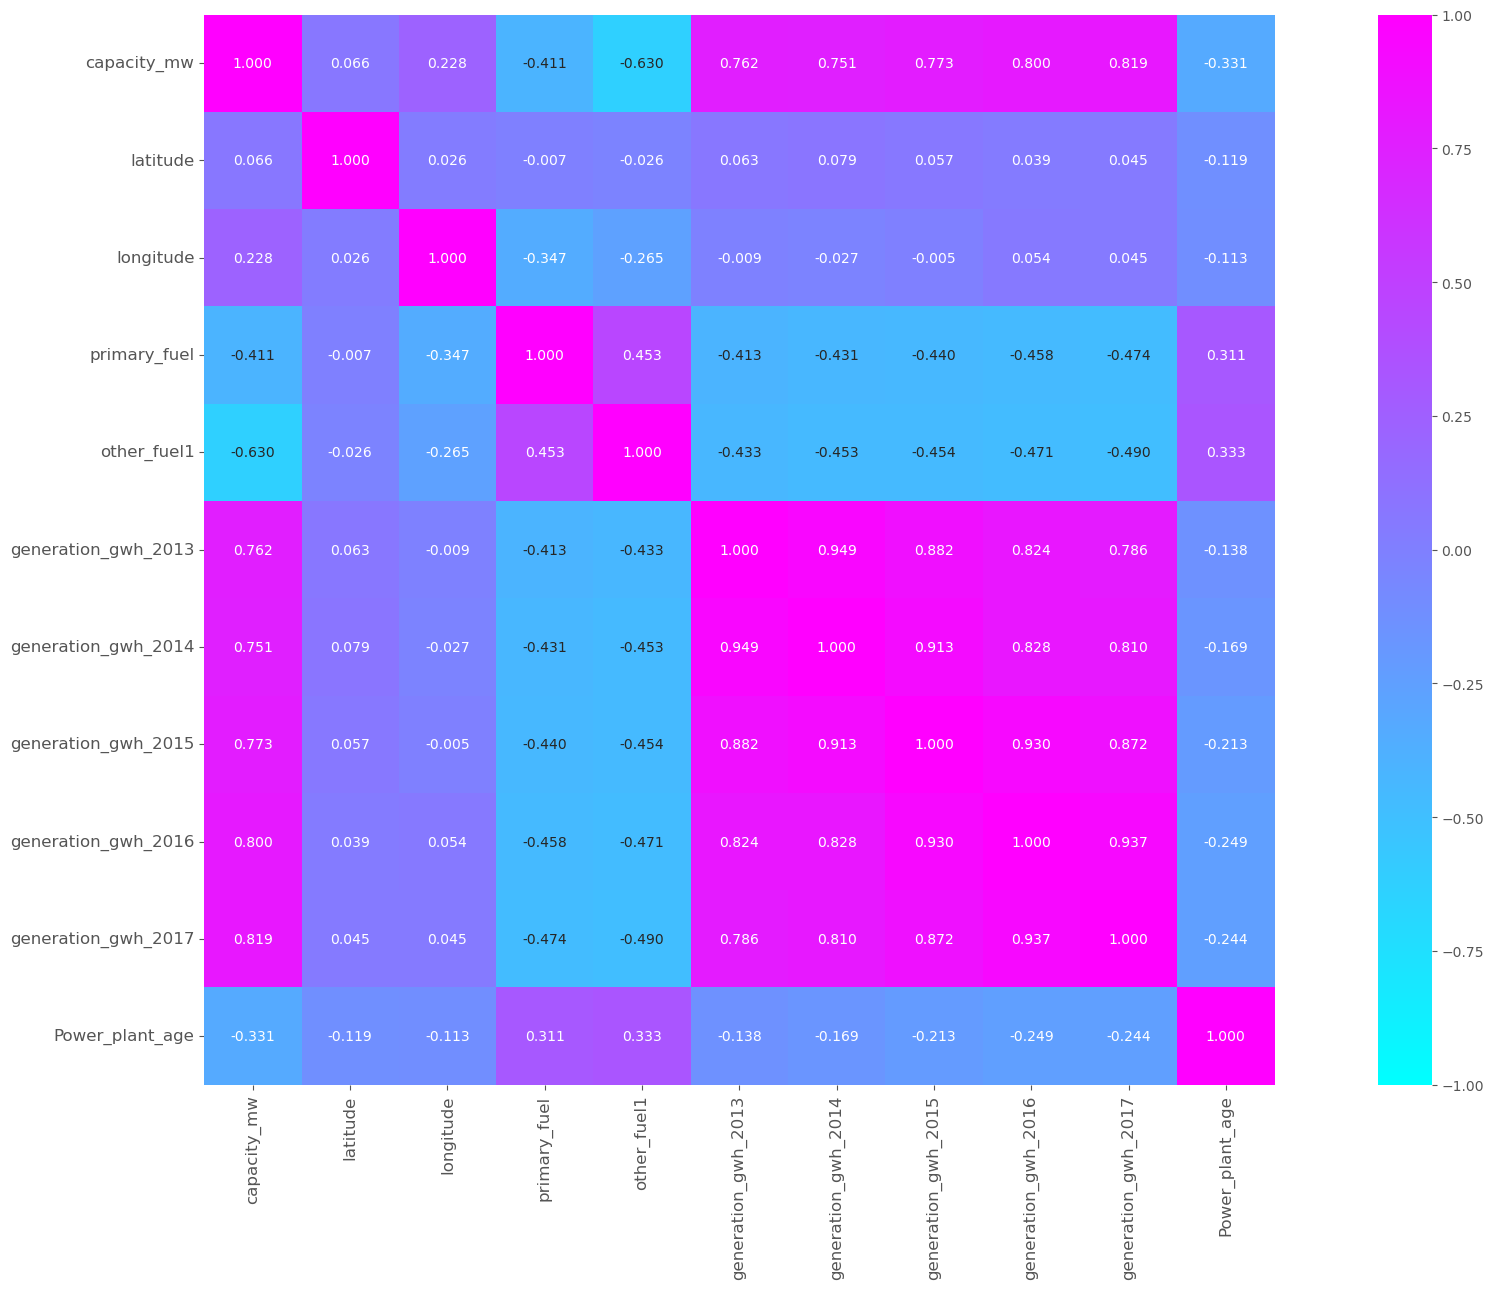

In [51]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

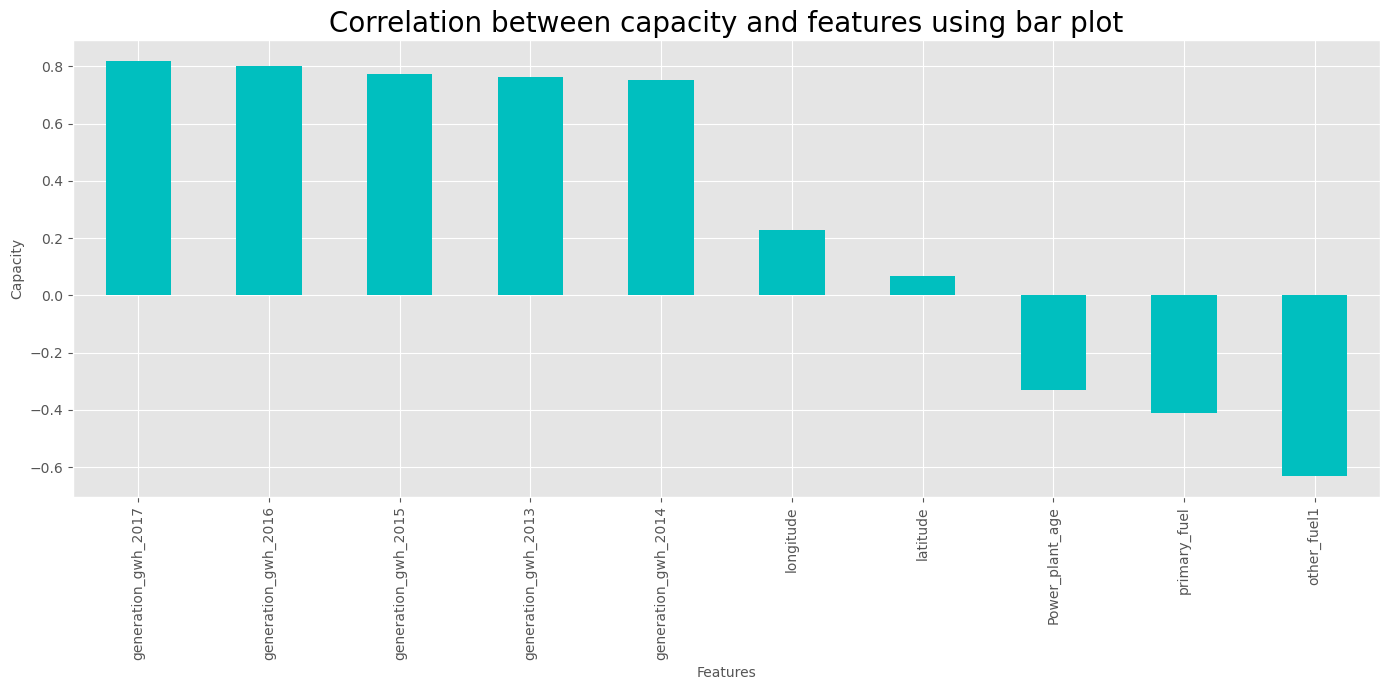

In [52]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

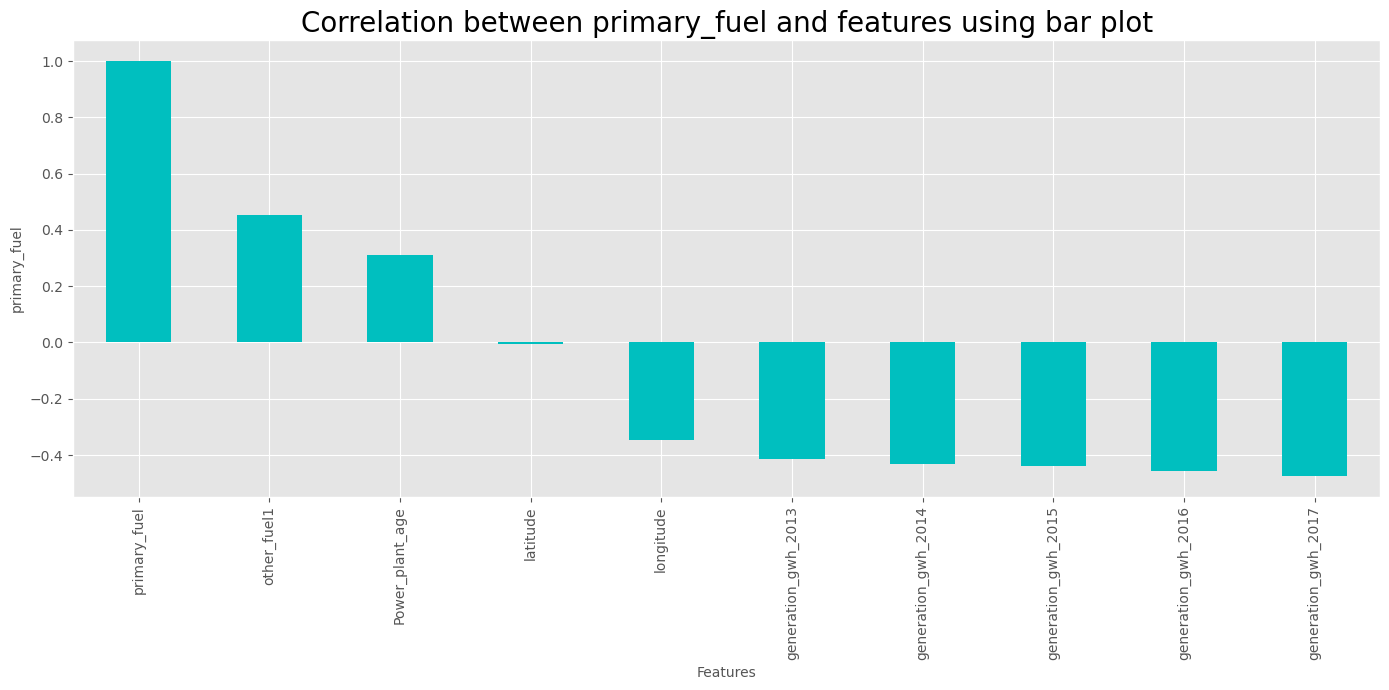

In [53]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

In [54]:
data.skew()

capacity_mw            1.916893
latitude              -0.131807
longitude              1.212556
primary_fuel           0.421089
other_fuel1           -1.840569
generation_gwh_2013    1.669040
generation_gwh_2014    1.623857
generation_gwh_2015    1.530908
generation_gwh_2016    1.604813
generation_gwh_2017    1.495215
Power_plant_age        1.014046
dtype: float64

In [55]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [56]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.932286,0.492496,NaN,NaN,NaN,NaN,NaN,-0.833031
1,-0.514929,0.492496,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413541,0.492496,NaN,NaN,NaN,NaN,NaN,NaN
3,2.178041,0.492496,-0.110987,-0.108987,0.123448,0.149212,-0.027733,-0.198032
5,-2.753369,-2.030073,0.043362,0.256249,0.333265,0.315123,0.279015,-0.273345


In [57]:
data.skew()

capacity_mw            1.916893
latitude              -0.131807
longitude              0.000859
primary_fuel           0.421089
other_fuel1           -1.540619
generation_gwh_2013   -0.104089
generation_gwh_2014   -0.131641
generation_gwh_2015   -0.143899
generation_gwh_2016   -0.137670
generation_gwh_2017   -0.154677
Power_plant_age       -0.074023
dtype: float64

In [58]:
data.drop("other_fuel1",axis=1,inplace=True)

In [ ]:
data.drop("other_fuel1",axis=1,inplace=True)

data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [60]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [62]:
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [63]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (613, 4)
Training target vector size: (613,)
Test feature matrix size: (263, 4)
Test target vector size: (263,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.4296577946768061


Confusion matrix of DecisionTreeClassifier : 
 [[ 0  0  0  0  0  0  9  0]
 [ 0 17  0 39  0  0 20  0]
 [ 0  3  0 10  0  0  6  0]
 [ 0 11  0 64  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  1  0]
 [ 0  2  0  0  0  0 32  0]
 [ 0  0  0  0  0  0 43  0]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.52      0.22      0.31        76
           2       0.00      0.00      0.00        19
           3       0.54      0.85      0.66        75
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.29      0.94      0.44        34
           7       0.00      0.00      0.00        43

    accuracy                           0.43       263
   macro avg       0.17      0.25      0.1

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')

In [71]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [74]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=aut

ValueError: 
All the 840 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\komal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\komal\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\komal\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\komal\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\komal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\komal\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\komal\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\komal\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\komal\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\komal\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "C:\Users\komal\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\komal\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
GCV.best_params_

In [ ]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

In [ ]:
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

In [ ]:
import scikitplot as sktplt

In [ ]:
from sklearn import metrics
class_names = df.columns
metrics.plot_confusion_matrix(Final_mod, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()